In [8]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
samples = [1,7,9,16,36,39,45,45,46,48,51,100,101]
tmp_y = [1]*len(samples)
tmp_y

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

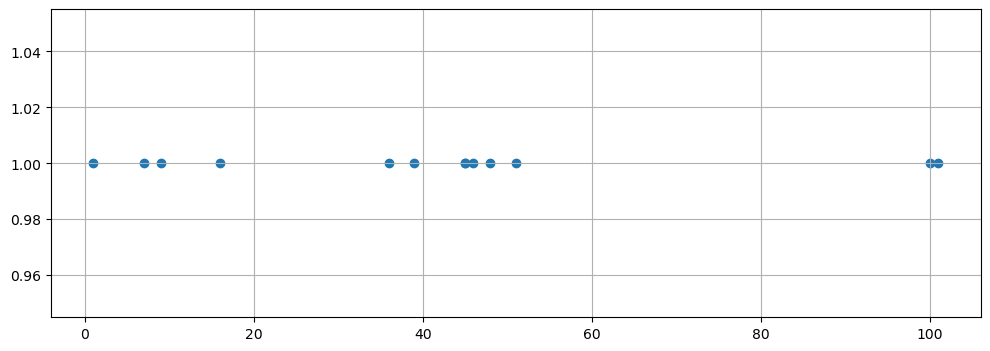

In [6]:
plt.figure(figsize=(12,4))
plt.scatter(samples, tmp_y)
plt.grid()
plt.show()

In [9]:
np.median(samples)

45.0

In [10]:
np.percentile(samples, 25)

16.0

In [11]:
np.percentile(samples, 75)

48.0

In [12]:
np.percentile(samples, 75) - np.percentile(samples, 25)

32.0

In [13]:
iqr = np.percentile(samples, 75) - np.percentile(samples, 25)
iqr * 1.5

48.0

In [14]:
q1 = np.percentile(samples, 25)
q2 = np.median(samples)
q3 = np.percentile(samples, 75)
upper_fence = q3 + iqr*1.5
lower_fence = q1 + iqr*1.5

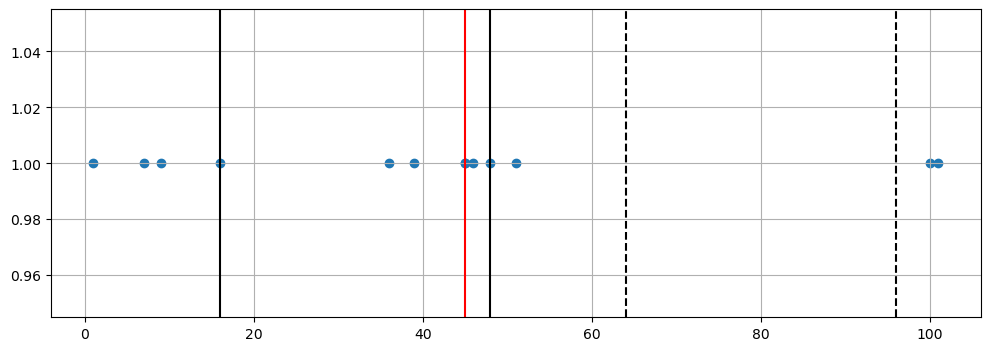

In [15]:
plt.figure(figsize=(12,4))
plt.scatter(samples, tmp_y)
plt.axvline(x=q1, color='black')
plt.axvline(x=q2, color='red')
plt.axvline(x=q3, color='black')
plt.axvline(x=upper_fence, color='black', ls='dashed')
plt.axvline(x=lower_fence, color='black', ls='dashed')
plt.grid()
plt.show()

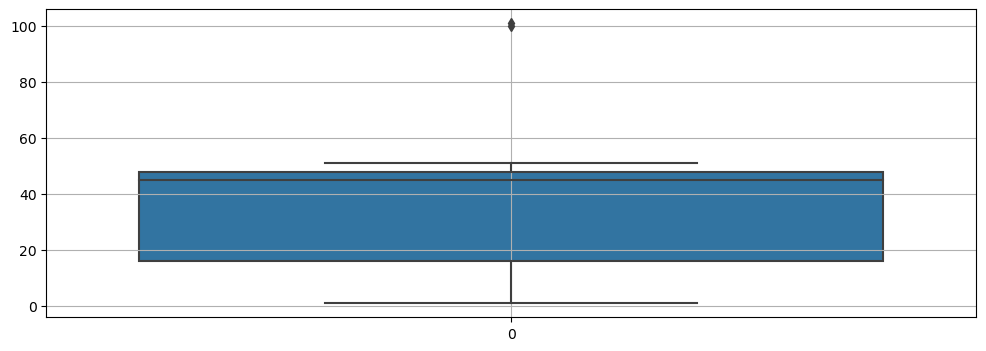

In [16]:
import seaborn as sns
plt.figure(figsize=(12,4))
sns.boxplot(samples)
plt.grid()
plt.show()

In [17]:
!pip install statsmodels

In [18]:
import pandas as pd

data = {'x':[1.,2.,3.,4.,5.], 'y':[1.,3.,4.,6.,5.]}
df = pd.DataFrame(data)
df

,x,y
0,1.0,1.0
1,2.0,3.0
2,3.0,4.0
3,4.0,6.0
4,5.0,5.0


In [19]:
import statsmodels.formula.api as smf

lm_model = smf.ols(formula="y~x", data=df).fit()

In [20]:
lm_model.params

Intercept    0.5
x            1.1
dtype: float64

In [21]:
%matplotlib inline

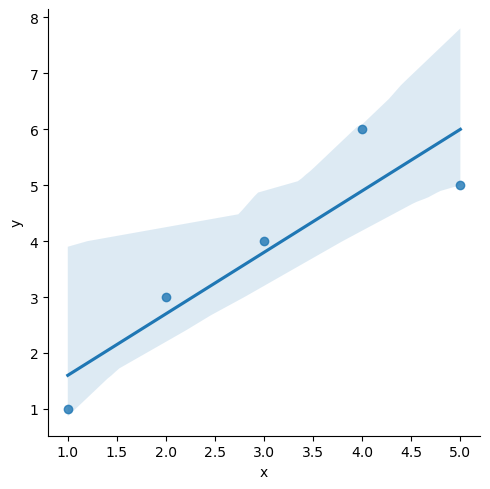

In [23]:
sns.lmplot(x='x', y='y', data=df);

In [24]:
resid = lm_model.resid
resid

0   -0.6
1    0.3
2    0.2
3    1.1
4   -1.0
dtype: float64

In [25]:
mu = np.mean(df.y)
y = df.y
yhat = lm_model.predict()
np.sum((yhat - mu)**2 / np.sum((y - mu)**2))

0.8175675675675671

In [26]:
lm_model.rsquared

0.8175675675675677

C:\Users\fins6\AppData\Local\Temp\ipykernel_31588\65180061.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(resid, color='black')


<Axes: ylabel='Density'>

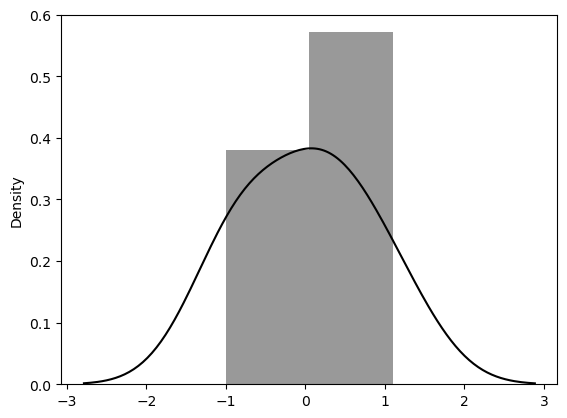

In [27]:
sns.distplot(resid, color='black')